In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import pandas as pd
import signal

In [3]:
import os

base_path = '/content/drive/MyDrive/weatherdata'


daily_path = os.path.join(base_path, 'daily/daily')


daily_files = [os.path.join(daily_path, f) for f in os.listdir(daily_path) if f.endswith('.txt') and f != 'README.txt']


print("Daily files:", daily_files)

Daily files: ['/content/drive/MyDrive/weatherdata/daily/daily/210824.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210819.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210826.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210901.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210830.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210903.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210829.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210904.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210831.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210905.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210828.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210902.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210906.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210911.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210908.txt', '/content/drive/MyDrive/weatherdata/daily/daily/210912.txt', '/content/

In [4]:
# Define timeout exception
class TimeoutException(Exception):
    pass

def timeout_handler(signum, frame):
    raise TimeoutException

signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

In [5]:
def daily_reader(daily_files):
  daily_dfs = []
  daily_errors = []
  req_columns = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','Temp Ch 1','Hum Ch 1','Temp Ch 2','Hum Ch 2','UV','Solar','Dew Point','RainRate']
  for i, file in enumerate(daily_files):
    try:
        signal.alarm(60)  # Set the timeout to 60 seconds
        df_date = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1')
        date = list(df_date.columns)[0]
        if file.startswith('/content/drive/MyDrive/weatherdata/daily/daily/2'):
          req_columns = ['Time','Wind Dir','Wind Spd','Wind Gust','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','DailyRain','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:14]
          c = list(c)
        else:
          req_columns = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','Temp Ch 1','Hum Ch 1','Temp Ch 2','Hum Ch 2','UV','Solar','Dew Point','RainRate']
          df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
          c = (df.columns)[:16]
          c = list(c)
        di = {}
        for i,c1 in enumerate(req_columns):
          di[c[i]] = c1
        df_f = df[c]
        df_f = pd.DataFrame(df_f)
        df_f.rename(columns=di, inplace=True)
        main_col = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','RainRate']
        df_f = df_f[main_col]
        df_f = df_f.drop(index=0)
        df_f['Date'] = pd.to_datetime(date + ' ' + df_f['Time'], format='%d/%m/%y %H:%M')
        daily_dfs.append(df_f)
    except TimeoutException:
        print(f"Timeout reading {file}")
        print(i)
        daily_errors.append(file)
    except Exception as e:
        print(f"Error reading {file}: {e}")
        daily_errors.extend(file)
    finally:
        signal.alarm(0)  # Reset the alarm
  if daily_dfs:
    daily_data = pd.concat(daily_dfs, ignore_index=True)
  else:
    daily_data = pd.DataFrame()
  return daily_data, daily_errors

In [ ]:
daily_files[0]

'/content/drive/MyDrive/weatherdata/daily/daily/210824.txt'

In [6]:
file = daily_files[0]
if file.startswith('/content/drive/MyDrive/weatherdata/daily/daily/2'):
  req_columns = ['Time','Wind Dir','Wind Spd','Wind Gust','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','DailyRain','RainRate']
  df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
  c = (df.columns)[:14]
  c = list(c)
else:
  req_columns = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','Temp Ch 1','Hum Ch 1','Temp Ch 2','Hum Ch 2','UV','Solar','Dew Point','RainRate']
  df = pd.read_csv(file, delim_whitespace=True, encoding='ISO-8859-1', header= 1)
  c = (df.columns)[:16]
  c = list(c)
di = {}
print(c)
print(df.columns)
for i,c1 in enumerate(req_columns):
  di[c[i]] = c1
df_f = df[c]
df_f = pd.DataFrame(df_f)
df_f.rename(columns=di, inplace=True)
main_col = ['Time','Wind Dir','Wind Spd','Hum In','Humidity','Temp In','Temp','Raw Barom','UV','Solar','Dew Point','RainRate']
df_f = df_f[main_col]
df_f = df_f.drop(index=0)
#df_f['Date'] = pd.to_datetime(date + ' ' + df_f['Time'], format='%d/%m/%y %H:%M')
df_f


['Time', 'Wind', 'Dir', 'Wind.1', 'Spd', 'Wind.2', 'Gust', 'Hum', 'In', 'Humidity', 'Temp', 'In.1', 'Temp.1', 'Raw']
Index(['Time', 'Wind', 'Dir', 'Wind.1', 'Spd', 'Wind.2', 'Gust', 'Hum', 'In',
       'Humidity', 'Temp', 'In.1', 'Temp.1', 'Raw', 'Barom', 'UV', 'Solar',
       'Dew', 'Point', 'DailyRain', 'RainRate'],
      dtype='object')


,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate
1,0:00,314.0,3.2,50,94,19.3,11.3,1023.1,0.0,0,10.3,0.0
2,0:01,314.0,0.0,51,94,19.2,11.3,1023.1,0.0,0,10.4,0.0
3,0:02,314.0,0.0,51,94,19.2,11.3,1023.1,0.0,0,10.4,0.0
4,0:03,314.0,0.0,51,94,19.2,11.3,1023.1,0.0,0,10.4,0.0
5,0:04,314.0,0.0,51,94,19.2,11.3,1023.1,0.0,0,10.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,23:55,337.0,0.0,50,89,21.2,15.0,1021.9,0.0,0,13.2,0.0
1437,23:56,296.0,0.0,50,89,21.2,15.0,1021.9,0.0,0,13.2,0.0
1438,23:57,296.0,0.0,50,89,21.2,15.0,1021.9,0.0,0,13.2,0.0
1439,23:58,296.0,0.0,51,89,21.2,15.0,1021.9,0.0,0,13.2,0.0


In [4]:
error_files = []
daily_df = pd.DataFrame()
num_parts = 11
part_size = len(daily_files) // num_parts
remainder = len(daily_files) % num_parts
start = 0
for i in range(num_parts):
  end = start + part_size + (1 if i < remainder else 0)
  df, err = daily_reader(daily_files[start:end])
  error_files.extend(err)
  start = end
  daily_df = pd.concat([daily_df, df], axis=0)

NameError: name 'daily_reader' is not defined

In [13]:
daily_df.to_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [4]:
daily_df = pd.read_csv('/content/drive/MyDrive/weatherdata/daily_data.csv')

In [5]:
daily_df.head()

,Unnamed: 0,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date,Wind Gust,DailyRain
0,0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00,NaN,NaN
1,1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00,NaN,NaN
2,2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00,NaN,NaN
3,3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00,NaN,NaN
4,4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00,NaN,NaN


In [6]:
daily_df.drop(columns=['Unnamed: 0', 'Wind Gust','DailyRain'], inplace=True)

In [7]:
daily_df.head()

,Time,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
0,0:00,314.0,3.2,50.0,94.0,19.3,11.3,1023.1,0.0,0.0,10.3,0.0,2021-08-24 00:00:00
1,0:01,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:01:00
2,0:02,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:02:00
3,0:03,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:03:00
4,0:04,314.0,0.0,51.0,94.0,19.2,11.3,1023.1,0.0,0.0,10.4,0.0,2021-08-24 00:04:00


In [8]:
daily_df['Date'] = pd.to_datetime(daily_df['Date'])

In [9]:
daily_df['Day']= daily_df['Date'].dt.date

In [10]:
daily_df.drop(columns='Time', inplace=True)

In [11]:
temp= daily_df.groupby('Day').mean()

In [12]:
temp.head()

,Wind Dir,Wind Spd,Hum In,Humidity,Temp In,Temp,Raw Barom,UV,Solar,Dew Point,RainRate,Date
Day,,,,,,,,,,,,
2011-08-05,189.977578,3.617339,33.327354,62.443946,29.109417,21.350374,1003.826607,1.827354,285.281016,13.654709,0.000000,2011-08-05 18:24:58.834080768
2011-08-06,213.656250,4.847222,30.090972,76.365972,26.555972,16.172778,997.229167,0.968056,144.712500,11.821667,0.000000,2011-08-06 11:59:29.708333312
2011-08-07,226.135417,6.655556,34.025694,85.152778,23.736250,13.971806,996.112500,1.091667,175.266667,11.404028,0.354028,2011-08-07 11:59:29.541666560
2011-08-10,229.465278,8.665694,33.311806,70.857639,24.094444,16.374583,1014.324514,1.547569,223.140278,10.706736,0.000000,2011-08-10 11:59:29.875000064
2011-08-11,230.363889,9.272222,39.216667,81.109722,25.209792,17.386042,1003.970278,0.770139,128.063889,14.071042,0.049722,2011-08-11 11:59:29.791666688


In [13]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4441 entries, 2011-08-05 to 2024-05-21
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Wind Dir   4441 non-null   float64       
 1   Wind Spd   4441 non-null   float64       
 2   Hum In     4441 non-null   float64       
 3   Humidity   4441 non-null   float64       
 4   Temp In    4441 non-null   float64       
 5   Temp       4441 non-null   float64       
 6   Raw Barom  4441 non-null   float64       
 7   UV         4441 non-null   float64       
 8   Solar      3691 non-null   float64       
 9   Dew Point  2007 non-null   float64       
 10  RainRate   2007 non-null   float64       
 11  Date       4441 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(11)
memory usage: 451.0+ KB


Exploratory Data Analysis EDA

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = daily_df.copy()

# Convert 'RainRate' column to numeric, handling non-numeric values
data['RainRate'] = pd.to_numeric(data['RainRate'], errors='coerce')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows
print(data.head())

# Data Cleaning: Check for missing values and data types
print(data.info())
print(data.isnull().sum())

   Wind Dir  Wind Spd  Hum In  Humidity  Temp In  Temp  Raw Barom   UV  Solar  \
0     314.0       3.2    50.0      94.0     19.3  11.3     1023.1  0.0    0.0   
1     314.0       0.0    51.0      94.0     19.2  11.3     1023.1  0.0    0.0   
2     314.0       0.0    51.0      94.0     19.2  11.3     1023.1  0.0    0.0   
3     314.0       0.0    51.0      94.0     19.2  11.3     1023.1  0.0    0.0   
4     314.0       0.0    51.0      94.0     19.2  11.3     1023.1  0.0    0.0   

   Dew Point  RainRate                Date         Day  
0       10.3       0.0 2021-08-24 00:00:00  2021-08-24  
1       10.4       0.0 2021-08-24 00:01:00  2021-08-24  
2       10.4       0.0 2021-08-24 00:02:00  2021-08-24  
3       10.4       0.0 2021-08-24 00:03:00  2021-08-24  
4       10.4       0.0 2021-08-24 00:04:00  2021-08-24  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380424 entries, 0 to 6380423
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----      

In [5]:
data['year']= data['Date'].dt.year
data['month']= data['Date'].dt.month

NameError: name 'data' is not defined

In [20]:
# Summary Statistics
summary_stats = data.describe()
print(summary_stats)


           Wind Dir      Wind Spd        Hum In      Humidity       Temp In  \
count  6.380424e+06  6.380424e+06  6.380424e+06  6.380424e+06  6.380424e+06   
mean   2.023719e+02  5.191435e+00  3.823697e+01  7.178172e+01  4.157171e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -1.780000e+01   
25%    1.370000e+02  0.000000e+00  1.130000e+01  5.400000e+01  1.390000e+01   
50%    2.210000e+02  4.800000e+00  4.600000e+01  7.500000e+01  2.228000e+01   
75%    2.740000e+02  8.000000e+00  5.800000e+01  9.000000e+01  8.200000e+01   
max    3.590000e+02  6.600000e+01  8.800000e+01  9.800000e+01  9.800000e+01   
std    8.887898e+01  5.259111e+00  2.502519e+01  1.910992e+01  3.403426e+01   

               Temp     Raw Barom            UV         Solar     Dew Point  \
count  6.380424e+06  6.380424e+06  6.380424e+06  5.301699e+06  2.883541e+06   
mean   1.385591e+01  6.295819e+02  5.225474e-01  5.869436e+01  8.021935e+00   
min   -1.780000e+01 -6.700000e+00  0.000000e+00 -2.

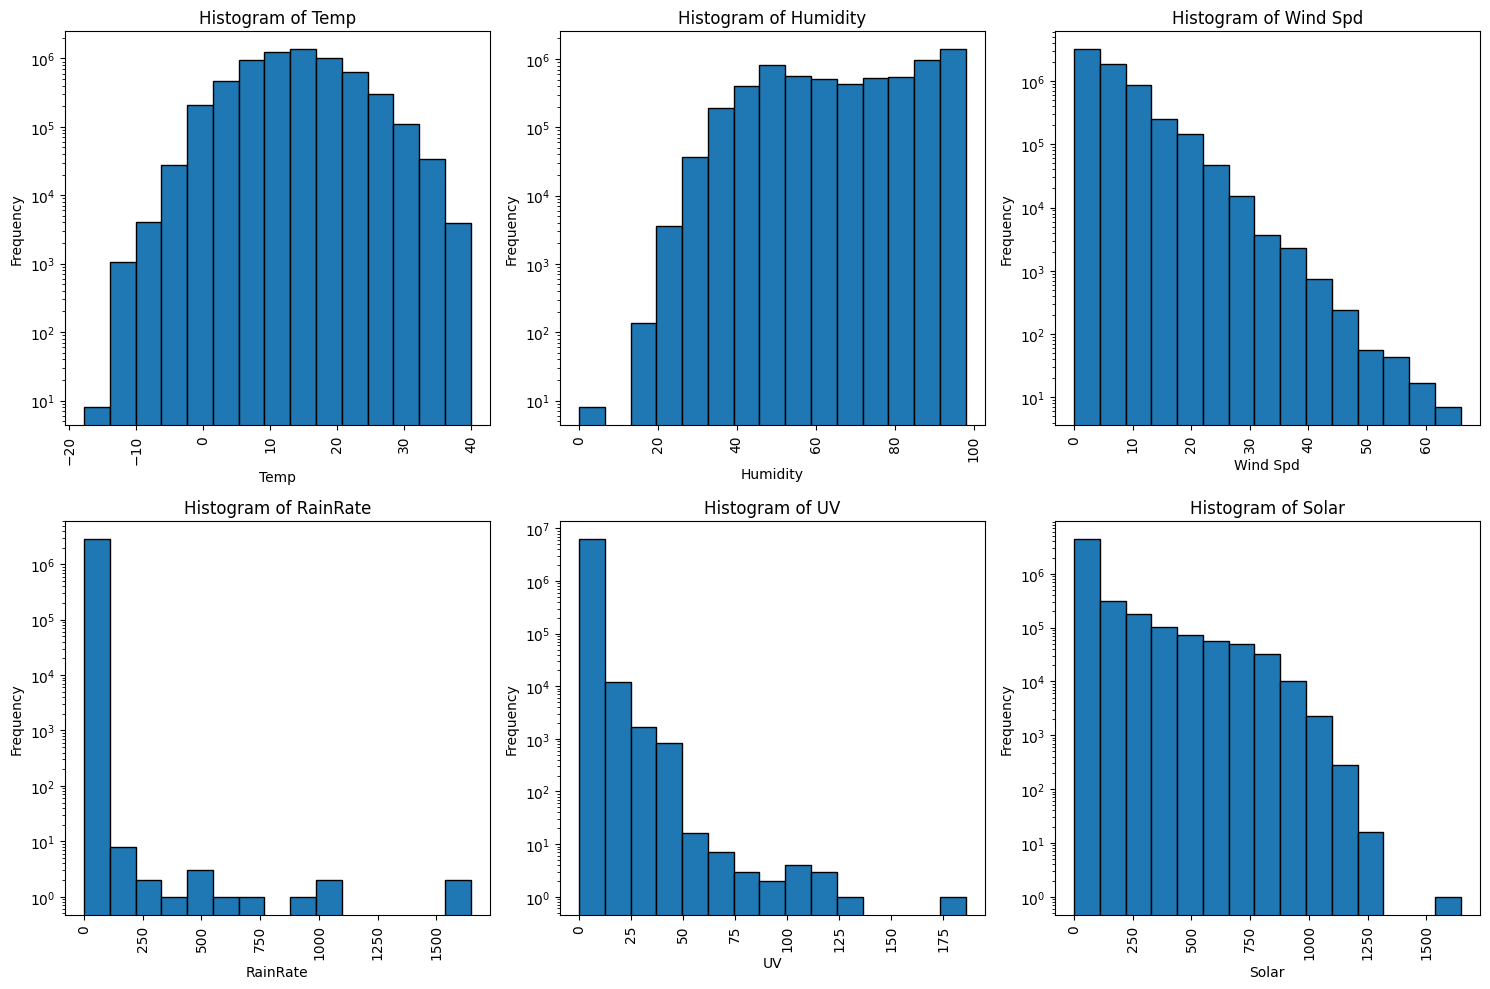

In [21]:
# Distribution Analysis: Histograms
variables = ['Temp', 'Humidity', 'Wind Spd', 'RainRate', 'UV', 'Solar']
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[var].dropna(), bins=15, color='tab:blue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.xscale('linear')
    plt.ylabel('Frequency')
    plt.yscale('log')

plt.tight_layout()
plt.show()


In [27]:
data['Temp'].max()

39.9

In [28]:
# Group by 'Year' and calculate the mean of 'Temp'
avg_UV_by_year = data.groupby('year')['UV'].mean().reset_index()
avg_solar_by_year = data.groupby('year')['Solar'].mean().reset_index()
avg_Humidity_by_year = data.groupby('year')['Humidity'].mean().reset_index()
avg_windspeed_by_year = data.groupby('year')['Wind Spd'].mean().reset_index()
avg_UV_by_year


,year,UV
0,2011,0.559722
1,2012,0.628140
2,2013,0.069191
3,2014,0.076858
4,2015,0.625205
5,2016,0.713721
6,2017,0.711825
7,2018,0.690737
8,2019,0.691053
9,2020,0.569670


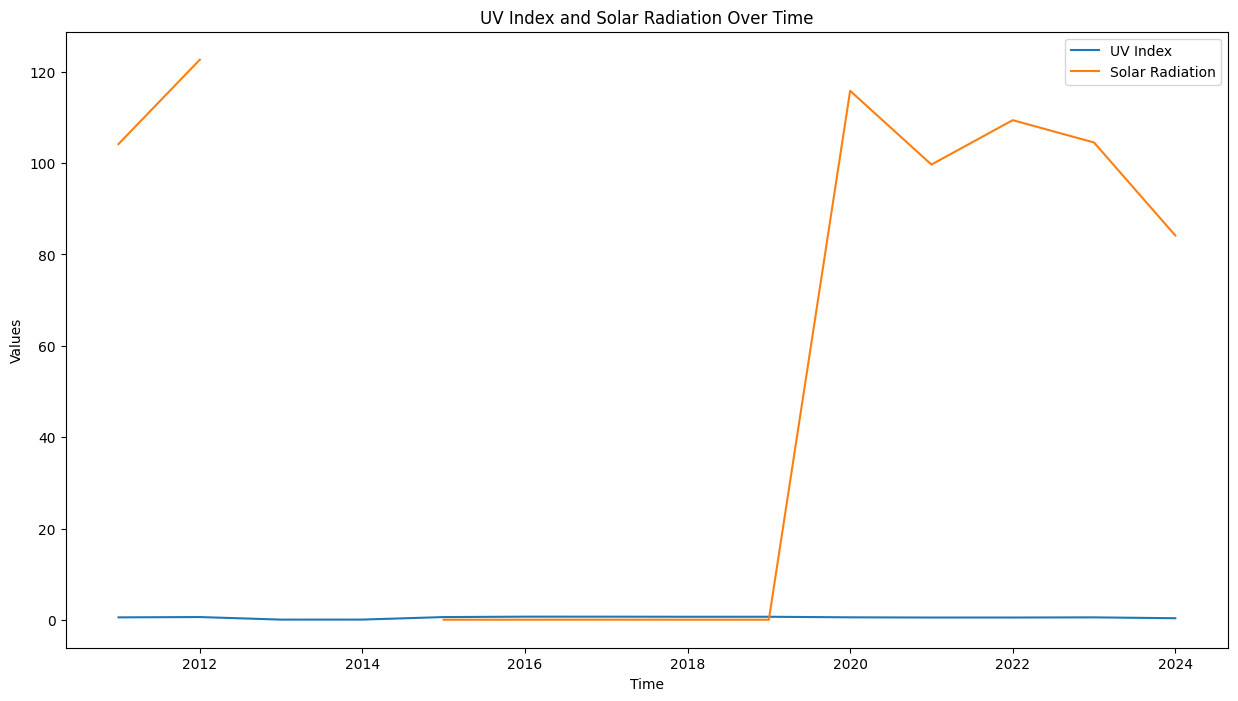

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(avg_UV_by_year['year'], avg_UV_by_year['UV'], label='UV Index')
plt.plot(avg_solar_by_year['year'], avg_solar_by_year['Solar'], label='Solar Radiation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('UV Index and Solar Radiation Over Time')
plt.legend()
plt.show()


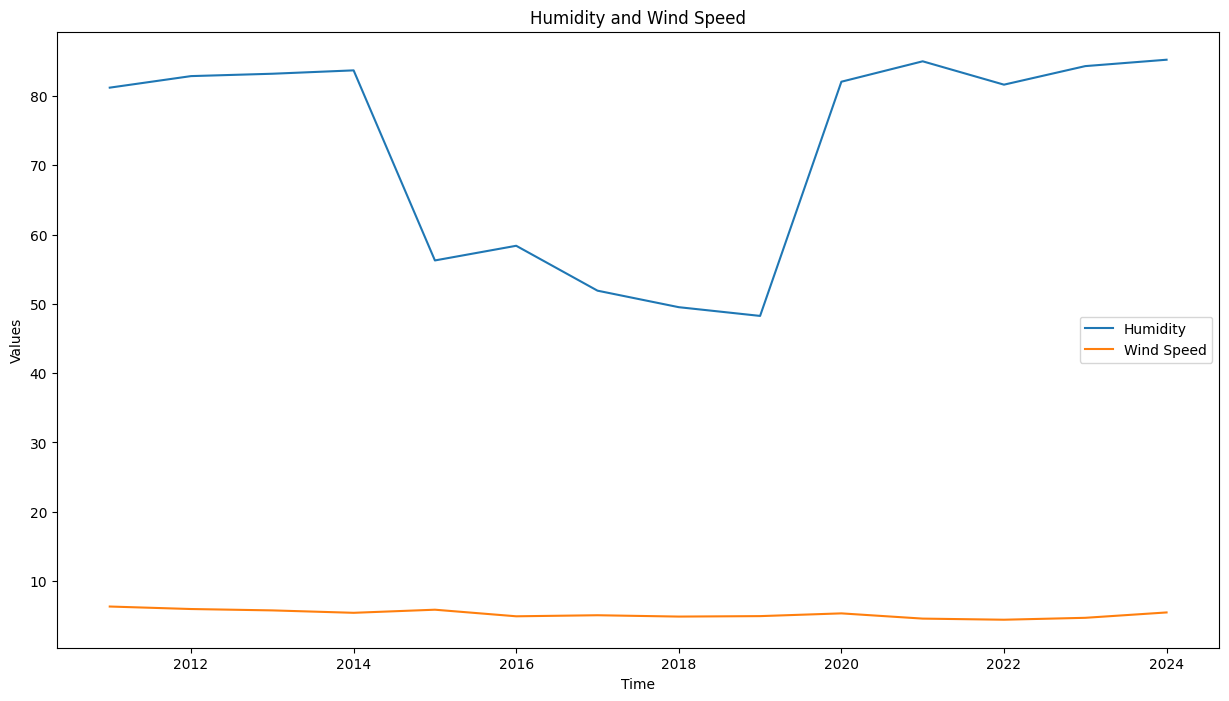

In [30]:
plt.figure(figsize=(15, 8))
plt.plot(avg_Humidity_by_year['year'], avg_Humidity_by_year['Humidity'], label='Humidity')
plt.plot(avg_windspeed_by_year['year'], avg_windspeed_by_year['Wind Spd'], label='Wind Speed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Humidity and Wind Speed')
plt.legend()
plt.show()

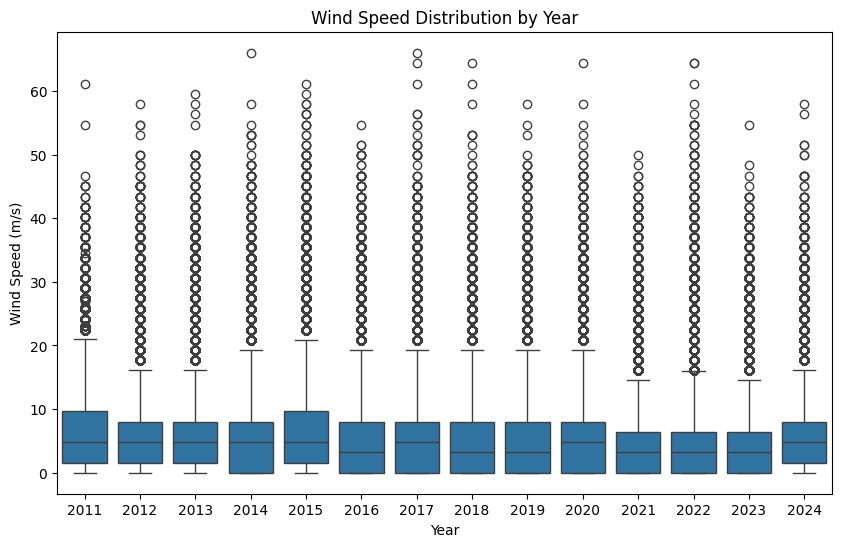

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='Wind Spd', data=data)
plt.title('Wind Speed Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Wind Speed (m/s)')
plt.show()


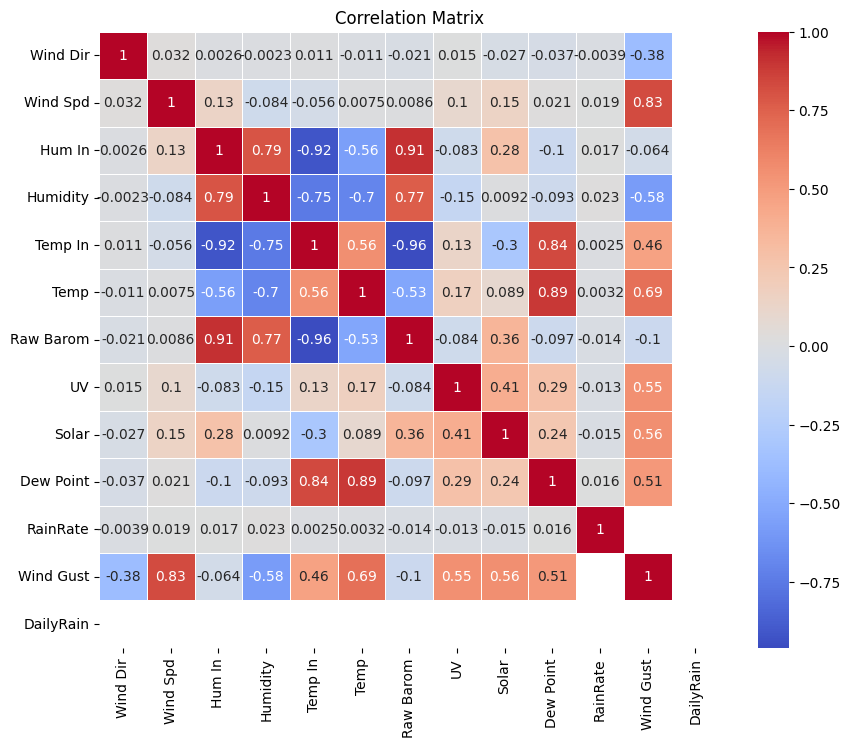

In [8]:
# Correlation Analysis
data = data.drop(['Date'], axis=1)
data = data.drop(['Time'], axis=1)
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Pre Processing

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = temp


In [49]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Check for missing values
print(df.isnull().sum())


Wind Dir     0
Wind Spd     0
Hum In       0
Humidity     0
Temp In      0
Temp         0
Raw Barom    0
UV           0
Solar        0
Dew Point    0
RainRate     0
Date         0
Year         0
dtype: int64


In [50]:
# Select only numeric columns for filling missing values
numeric_cols = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())  # Fill missing values only in numeric columns


# Normalize or standardize numerical columns
numeric_cols = ['Wind Dir', 'Wind Spd', 'Hum In', 'Humidity', 'Temp In', 'Temp', 'Raw Barom', 'UV', 'Solar', 'Dew Point', 'RainRate']
scaler = StandardScaler()
#df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [51]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Display the preprocessed DataFrame
print(df.head())

            Wind Dir  Wind Spd    Hum In  Humidity   Temp In      Temp  \
Day                                                                      
2011-08-05 -0.198963 -0.492282 -0.199935 -0.541566 -0.373007  1.136943   
2011-08-06  0.182001 -0.107882 -0.331849  0.265746 -0.449369  0.351477   
2011-08-07  0.382777  0.457313 -0.171471  0.775276 -0.533694  0.017579   
2011-08-10  0.436351  1.085583 -0.200568 -0.053672 -0.522982  0.382092   
2011-08-11  0.450809  1.275153  0.040112  0.540827 -0.489627  0.535535   

            Raw Barom        UV     Solar  Dew Point  RainRate  \
Day                                                              
2011-08-05   0.773584  1.149747  3.130721   1.755050 -0.527870   
2011-08-06   0.759953  0.392533  1.188330   1.183424 -0.527870   
2011-08-07   0.757646  0.501460  1.610531   1.053186  2.061556   
2011-08-10   0.795275  0.903201  2.272054   0.835739 -0.527870   
2011-08-11   0.773881  0.218129  0.958278   1.884881 -0.164193   

                  

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
# Define the features and target
X = df.drop(columns=['Temp', 'Date'])
y = df['Temp']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = StandardScaler().fit_transform(X_train)



modelling

In [54]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [55]:
# Make predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [56]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.13646792562128243
Mean Squared Error: 0.04169458357193409
R^2 Score: 0.958218756988837


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [32]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)

In [33]:
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [35]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.357450670711546
Mean Squared Error: 0.2877260896805791
R^2 Score: 0.7116758906380334


In [36]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
r2 = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.15321681053791644
Mean Squared Error: 0.04929539142414689
R^2 Score: 0.9506021513593175
